Here I provide an alternative implementation of the TSP: This implementation allows me to use the minimum spanning tree (MST) heuristic.By scrolling down to look at the outcome of this code, we can see that the heuristic allows us significant computataional advantages.

initial route ('A',)
initial route length 1
initial route cost 0.0
('A', 'T', 'D', 'C', 'R', 'P', 'G', 'E', 'V', 'N', 'O')
weighted astar
PATH COST 1573.266727070963
EX TIME 46.57731533050537
('A', 'T', 'D', 'C', 'R', 'P', 'G', 'E', 'V', 'N', 'O')
astar
PATH COST 1573.266727070963
EX TIME 73.26921105384827
('A', 'T', 'D', 'C', 'R', 'P', 'G', 'E', 'V', 'N', 'O')
uniform-cost
PATH COST 1573.266727070963
EX TIME 78.26286435127258


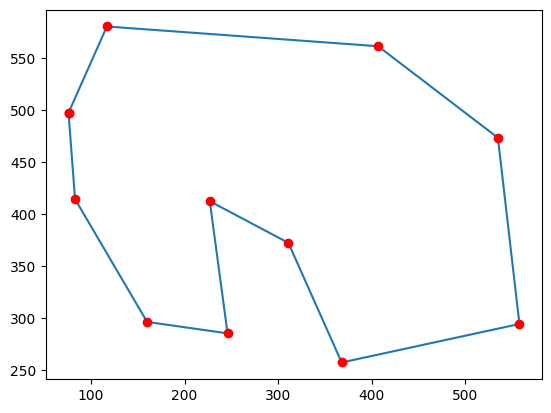

In [1]:
from search_2 import *
import numpy as np
import matplotlib.pyplot as plt

# this file contains a basic implementation of Kruskal's algorithm for MST
from Graph import *
import time


romania = {'A': ( 76, 497), 'D': (160, 296),
           'E': (558, 294), 'G': (368, 257),
           'N': (407, 561), 'R': (227, 412),
           'T': ( 83, 414), 'V': (535, 473),
           'O': (117, 580), 'P': (311, 372),
           'C': (246, 285)}

distances = {}
cities = []

# fill out distances
for city in romania.keys():
    distances[city] = {}
    cities.append(city)

for name_1, coordinates_1 in romania.items():
        for name_2, coordinates_2 in romania.items():
            distances[name_1][name_2] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])
            distances[name_2][name_1] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])

def cost(route):
    c = 0
    for i in range(len(route)-1):
        c += distances[route[i]][route[i+1]]
    c += distances[route[0]][route[-1]]
    return c

class TSP(Problem):
    
    def is_goal(self, state):
        return len(state) == len(romania)
    
    def actions(self, state): 
        """The places neighboring `state`."""
        visited = list(state)
        unvisited = [x for x in cities if x not in visited]
        new_states = set()
        for i in unvisited:
            new_state = state
            new_state = new_state + (i,)
            new_states.add(new_state)
        return new_states
        
    def result(self, state, action):
        """Go to the `action` place, if the map says that is possible."""
        return action
    
    def action_cost(self, s, action, s1):
        """The distance (cost) to go from s to s1."""
        return cost(action)

    def h(self, n):
        visited = list(n.state)
        unvisited = [x for x in cities if x not in visited]
        #print("unvisited", unvisited)
        # There are three components to this heurisitc:
        #    1) smallest distance to the nearest unvisited city from the current city
        current_city = n.state[-1]
        if not unvisited:
            return 0
        min_city = unvisited[0]
        min_distance_current = distances[current_city][min_city]
        for c in unvisited:
            if distances[current_city][c] < min_distance_current:
                min_distance_current = distances[current_city][c]
                min_city = c
        #    2) nearest distance from an unvisited city to the start city
        start_city = n.state[0]
        if not unvisited:
            return 0
        min_city = unvisited[0]
        min_distance_start = distances[start_city][min_city]
        for c in unvisited:
            if distances[start_city][c] < min_distance_start:
                min_distance_start = distances[start_city][c]
                min_city = c
        #    3) estimated distance to travel all the unvisited cities 
        #       (MST heuristic used here)
        rint = {}
        keys = unvisited
        for k in range(len(keys)):
            rint[keys[k]] = k
            
        g = Graph(len(keys))
        for c1 in keys:
            for c2 in keys:
                if c1 == c2:
                    continue
                g.add_edge(rint[c1], rint[c2], distances[c1][c2])

        mst = g.kruskal_mst()
        total_weight = 0
        for u, v, weight in mst:
            total_weight = total_weight + weight
        
        return min_distance_current + min_distance_start + total_weight

    def h_weighted(self, n):
        return 2*self.h(n)
        

initial_route = tuple('A')

print("initial route", initial_route)
print("initial route length", len(initial_route))
print("initial route cost", cost(initial_route))

def astar_mst(problem): return astar_search(problem, h=problem.h)
def astar_mst_weighted(problem): return astar_search(problem, h=problem.h_weighted)

r0 = TSP(initial = initial_route)
t0 = time.time()
path = path_states(astar_mst_weighted(r0)) 
t1 = time.time()
print(path[-1])
print("weighted astar")
print("PATH COST", cost(path[-1]))
print("EX TIME", t1- t0)

t0 = time.time()
path = path_states(astar_mst(r0)) 
t1 = time.time()
print(path[-1])
print("astar")
print("PATH COST", cost(path[-1]))
print("EX TIME", t1- t0)

t0 = time.time()
path = path_states(uniform_cost_search(r0)) 
t1 = time.time()
print(path[-1])
print("uniform-cost")
print("PATH COST", cost(path[-1]))
print("EX TIME", t1- t0)

data = []
for p in path[-1]:
    data.append(romania[p])
data.append(data[0])

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'or')
plt.show()

In [2]:
report([uniform_cost_search,
        astar_mst,
        astar_mst_weighted], [r0]) 

uniform_cost_search:
2,122,246 nodes |  696,159 goal | 9613 cost | 696,168 actions | TSP(('A',), None)
2,122,246 nodes |  696,159 goal | 9613 cost | 696,168 actions | TOTAL

astar_mst:
1,482,426 nodes |  446,164 goal | 9613 cost | 446,173 actions | TSP(('A',), None)
1,482,426 nodes |  446,164 goal | 9613 cost | 446,173 actions | TOTAL

astar_mst_weighted:
  943,808 nodes |  259,455 goal | 9613 cost | 259,464 actions | TSP(('A',), None)
  943,808 nodes |  259,455 goal | 9613 cost | 259,464 actions | TOTAL



Here we can see the importance of selecting a good heuristic. Uniform search expands over 2 million nodes and takes around 78 seconds. Even with my poor implementation of Kruskal's algorithm for obtaining the MST, the total time taken for A* is 73 seconds. By using the heuristic we have "saved" A* from expanding 700,000 nodes and obtained a execution time advantage of 5 seconds. 

What is better is that we can weight the heuristic to obtain a weighted A* implementation, which more than halves the number of nodes that we expand in uniform-cost search. This is reflected in the execution time: 47 seconds. That is, by weighting the heuristic we have saved about 20 seconds on the execution time! :)

Although I should point out that by weighting the heuristic we have removed the guarantee of optimality of A*, but in this case we still get the optimal solution. 